## XGBOOST & DNN

### Methodology


*   ###### **Data Cleaning:** Checking for null values and based on their number either droping them or replacing with mean, median, mode based on the type and description of data. Droping decscrete and catagorical variables that have highly skewed histograms.
*   ###### **Data Visualization:** This step helps understand the understand the data in a visually. We can understand normality of the data as well. This helps us to decide whether to normalize the data. In case of catagorical variables it also helps in feature selection.
*   ###### **Feature Selection:** Based on the Pearson correlation between the labeled column and rest of the features. In general, a very great correlation should have an absolute value greater than 0.75. When the labeled column is depended on multiple columns, the correlation with one column may be less. But combined features may have higher effect.
*   ######  **Train Test Split:** We split the data into 80:20 ratio for tarining testing respectively.
*   ###### **Model Selection:** Based on the data visualization and data correlation, we need to select a model that would best suit. Here we need to use XGBOOST.

*   ###### **Evalution:** In this case we are using RMSE, R2 Score to determine the accuracy of the predicting model.



 ##### Importing data

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
import numpy as np
import matplotlib.pyplot as plt
%load_ext tensorboard

11493376/11490434 [==============================] - 0s 0us/step


##### normalizing the data

In [ ]:
X_train = X_train/255
X_test = X_test/255

##### checking the shaps of data

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

##### one hot encoding of label feature

In [ ]:
import keras
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

##### ploting data

5

<Figure size 432x288 with 0 Axes>

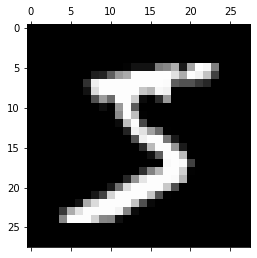

In [ ]:
plt.gray() 
plt.matshow(X_train[0]) 
np.argmax(y_train[0])

##### creating a simple NN on the data

In [ ]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential 

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation="relu"), 
                                    tf.keras.layers.Dense(10, activation="softmax")])

##### training the NN on the data

In [ ]:
tf.keras.backend.clear_session()
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=.1, callbacks=[keras.callbacks.TensorBoard()])

Epoch 1/50
  1/422 [..............................] - ETA: 0s - loss: 2.3343 - accuracy: 0.1406WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
422/422 [==============================] - 2s 4ms/step - loss: 0.3814 - accuracy: 0.8937 - val_loss: 0.1731 - val_accuracy: 0.9537
Epoch 2/50
422/422 [==============================] - 2s 4ms/step - loss: 0.1817 - accuracy: 0.9480 - val_loss: 0.1273 - val_accuracy: 0.9662
Epoch 3/50
422/422 [==============================] - 2s 4ms/step - loss: 0.1303 - accuracy: 0.9622 - val_loss: 0.1055 - val_accuracy: 0.9715
Epoch 4/50
422/422 [==============================] - 2s 4ms/step - loss: 0.1016 - accuracy: 0.9704 - val_loss: 0.0942 - val_accuracy: 0.9735
Epoch 5/50
422/422 [==============================] - 2s 4ms/step - lo

##### Testing the NN on the data

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1019 - accuracy: 0.9791


[0.1018671840429306, 0.9790999889373779]

there is no overfit in the model

##### ploting training and validation accuracy

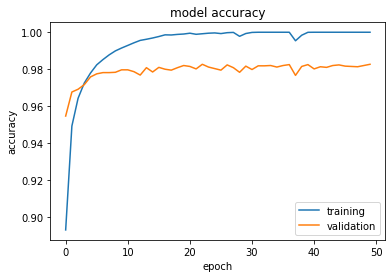

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

##### creating heat map for confusion matrix

In [ ]:
import numpy as np
p=model.predict(X_test)
pred=[]
act=[]
for i in range(len(X_test)):
    act.append(np.argmax(y_test[i]))
    pred.append(np.argmax(p[i]))

In [ ]:
from sklearn.metrics import confusion_matrix
confm=confusion_matrix(act, pred, labels=list(range(10)))

Text(114.0, 0.5, 'true label')

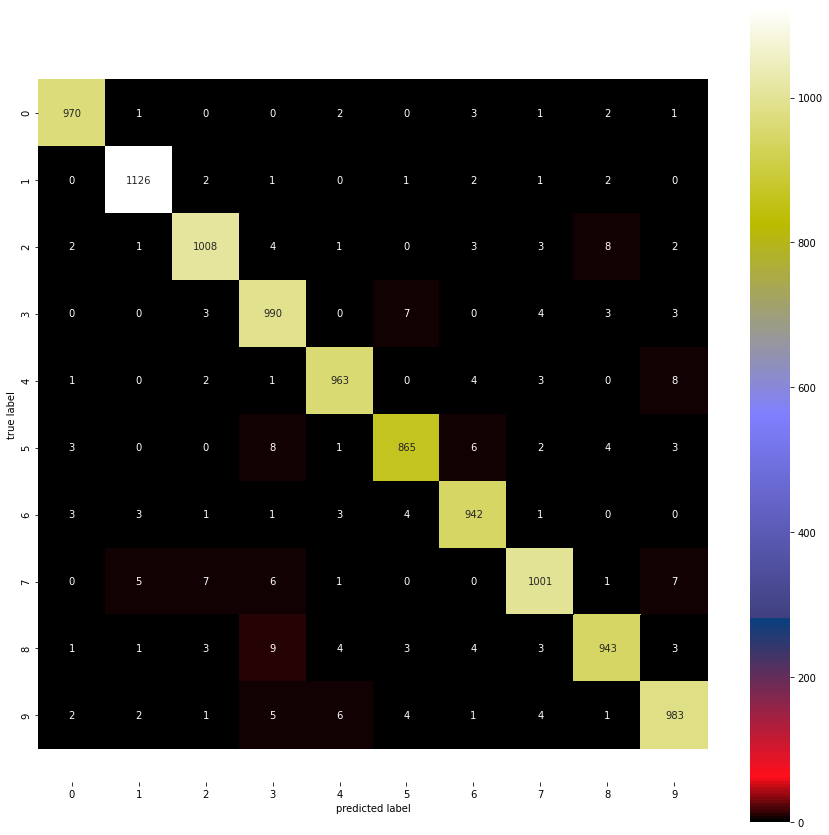

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
ax=sns.heatmap(confm,annot=True,fmt='d',cbar=True,square=True,cmap="gist_stern")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel("predicted label")
plt.ylabel("true label")

The errors are spread out in all the classes

##### training XGBoost on Data

In [ ]:
from xgboost import XGBClassifier
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train=X_train.reshape(60000,784) # flattening the data
X_test=X_test.reshape(10000,784)
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
model.score(X_train, y_train)

0.9434833333333333

##### Testing XGBoost on the data

There no overfit

In [ ]:
model.score(X_test, y_test)

0.9368

In [ ]:
import numpy as np
p=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confm=confusion_matrix(y_test, p, labels=list(range(10)))

Text(114.0, 0.5, 'true label')

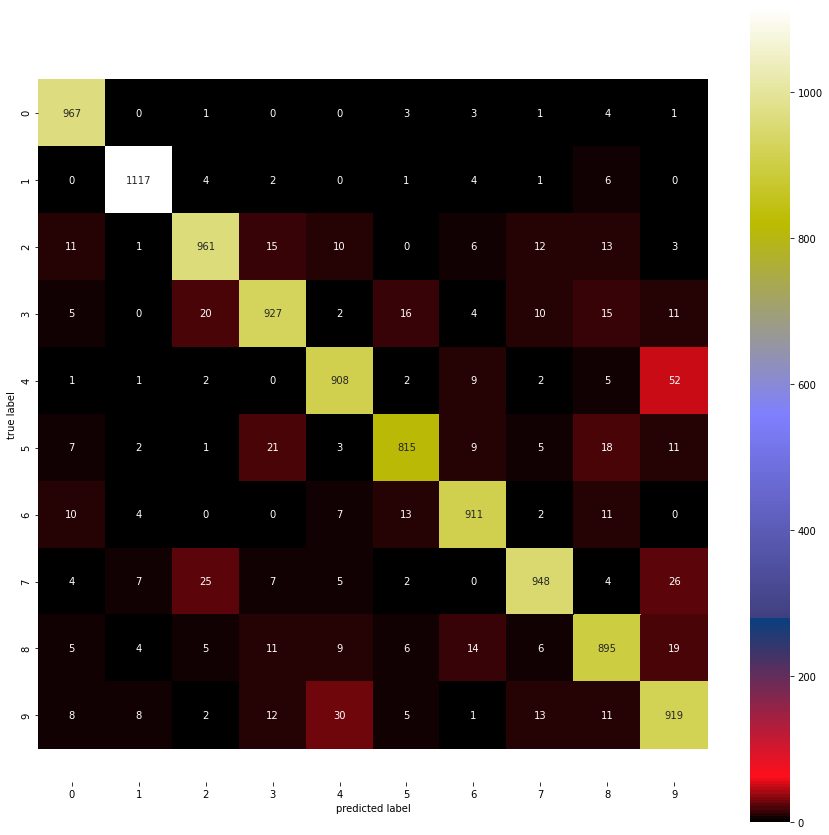

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
ax=sns.heatmap(confm,annot=True,fmt='d',cbar=True,square=True,cmap="gist_stern")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel("predicted label")
plt.ylabel("true label")

The errors are not so speardout and are more in number compaed to NN

Class 4 has 52 intsances clasified as 9 there is scope for learning